# Actividad - Regresión Lineal

* **Nombre:** Manuel Villalpando Linares
* **Matrícula:** A01352033

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

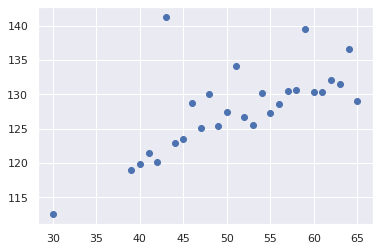

In [3]:
# Grafica la información de la edad y presión alta
x = df['Age']
y = df['Average of ap_hi']
plt.scatter(x, y);

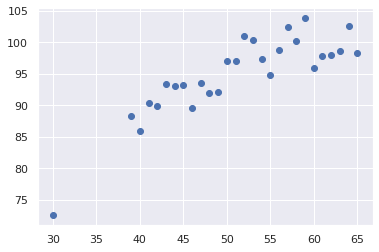

In [4]:
# Grafica la información de la edad y presión baja
x2 = df['Age']
y2 = df['Average of ap_lo']
plt.scatter(x2, y2);

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [6]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
alta = LinearRegression(fit_intercept=True)
alta.fit(x[:, np.newaxis], y)

print("Presion alta de a:", alta.coef_[0])
print("Presion alta de b:", alta.intercept_)

Presion alta de a: 0.47769702977669154
Presion alta de b: 103.3969740964366


<ipython-input-6-a3787ee28cfd>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  alta.fit(x[:, np.newaxis], y)


In [7]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
baja = LinearRegression(fit_intercept=True)
baja.fit(x2[:, np.newaxis], y2)

print("Presion baja de a:", baja.coef_[0])
print("Presion baja de b:", baja.intercept_)

Presion baja de a: 0.6089810580238237
Presion baja de b: 63.726200409422745


<ipython-input-7-78fc685f1979>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  baja.fit(x2[:, np.newaxis], y2)


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

<ipython-input-13-f1549f9ec777>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([x,x]), np.vstack([y, alta.predict(x[:, np.newaxis])]), color="green");


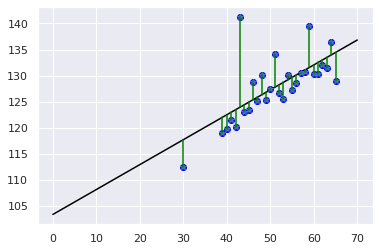

In [13]:
# Presión alta
reglinealx = np.linspace(0, 70, 1000)
reglinealy = alta.predict(reglinealx[:, np.newaxis])

plt.scatter(x, y, color="blue")
plt.plot(reglinealx, reglinealy, color="black");
plt.plot(x, y, '*')
plt.plot(np.vstack([x,x]), np.vstack([y, alta.predict(x[:, np.newaxis])]), color="green");

<ipython-input-14-d002f076ef88>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([x2,x2]), np.vstack([y2, baja.predict(x2[:, np.newaxis])]), color="green");


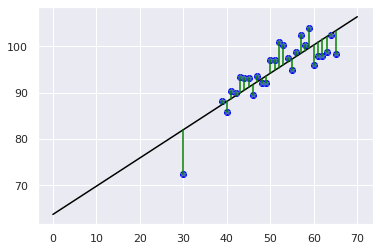

In [14]:
# Presión baja
reglinealx2 = np.linspace(0, 70, 1000)
reglinealy2 = baja.predict(reglinealx2[:, np.newaxis])

plt.scatter(x2, y2, color="blue")
plt.plot(reglinealx2, reglinealy2, color="black");
plt.plot(x2, y2, '*')
plt.plot(np.vstack([x2,x2]), np.vstack([y2, baja.predict(x2[:, np.newaxis])]), color="green");

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [15]:
def pressure_low(age):
  return baja.predict([[age]])

query_age= 76
pressure_low(query_age)

array([110.00876082])

In [16]:
def pressure_high(age):
  return alta.predict([[age]])
  return 

query_age= 76
pressure_high(query_age)

array([139.70194836])